<center>
    <h1> INF390 - Análisis Inteligente de Datos </h1>
    <h1> Tarea 1 - Visualización y Análisis Descriptivo de Datos con Python </h1>
    <h3>
        <table style="border: 0px;">
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> Aldo Berrios Valenzuela </td>
                <td style="text-align: center; border: 0px; padding-right: 110px;"> </td>
                <td style="text-align: center; border: 0px;"> Lukas Zamora Jabre </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; border: 0px;"> 201304018-7 </td>
                <td style="text-align: center; border: 0px; padding-right: 110px;"> </td>
                <td style="text-align: center; border: 0px;"> 201430047-6 </td>
            </tr>
            <tr style="border: 0px;">
                <td style="text-align: center; font-size: 14px; border: 0px;"> `aldo.berrios.13@sansano.usm.cl` </td>
                <td style="text-align: center; border: 0px; padding-right: 110px;"> </td>
                <td style="text-align: center; font-size: 14px; border: 0px;"> `lukas.zamora.14@sansano.usm.cl` </td>
            </tr>
        </table>
    </h3> 
    <h4> Valparaíso, Viernes 29 de Octubre de 2017 </h4>
</center>

# 1. &nbsp;&nbsp;&nbsp;&nbsp; Preliminares

Para el desarrollo de esta tarea usaremos el dataset que se encuentra en https://archive.ics.uci.edu/ml/datasets/Census+Income. Luego, importamos las librerías que usaremos durante el desarrollo de la tarea:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
plt.style.use('default')
%matplotlib inline

A continuación, cargamos el dataset con pandas:

In [2]:
df = pd.DataFrame.from_csv('census_income_dataset.csv')
df = df.reset_index()
df = df.rename(columns={'Capital-gain':'Capital_Gain',
                                                  'Education-Num':'Education_Num',
                                                 'Capital-loss': 'Capital_loss',
                                                 'hours-per-week': 'Hours_per_week',
                                                 'Nartive-country': 'Native_country'})
df.head()


,Age,Workclass,Fnlwgt,Education,Education_Num,Marital Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_loss,Hours_per_week,Native_country,Result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2. &nbsp;&nbsp;&nbsp;&nbsp; Desarrollo de Preguntas

## 2.1. &nbsp;&nbsp;&nbsp; Estudio de Estadística Descriptiva a 2 variables

Para realizar el estudio de estadística descriptiva seleccionaremos dos variables de nuestro dataset. Si bien, no nos imponen un criterio de seleccion de variables numéricas, nosotros elegiremos aquellas que estén mejor relacionadas. Para ello revisaremos la matríz de correlaciones:

In [3]:
df.corr()

,Age,Fnlwgt,Education_Num,Capital_Gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
Education_Num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
Capital_Gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
Capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
Hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


Como podemos observar, no existe mucha relación entre las variables, así que elegiremos aquellas que tienen mayor correlación en comparación con el resto. Es por ello, que escogeremos *Capital_Gain* y *Education_Num* para hacer el análisis (*Education_Num* y *Hours_per_week* tienen una mayor correlación, pero queremos hacer nuestro análisis en base a esas dos variables).

### 2.1.1. &nbsp;&nbsp; Capital Gain

Comenzamos analizando los principales estadísticos de la variable:

In [4]:
df["Capital_Gain"].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

Analizando la información anterior notamos que al menos el 75% de los datos es cero, es por ello, que sin necesidad de graficar la distribución de los datos vemos que *Capital_Gain* está sesgada hacia la derecha, es decir, es una distribución asimétrica. Cuando lleguemos a la sección de los gráficos confirmaremos esta hipótesis.

Como podemos observar, el método `describe()` no nos entregó la moda, así que la calculamos:

In [5]:
df['Capital_Gain'].mode()

0    0
dtype: int64

De lo anterior, se tiene que la moda es cero, y esto era bastante esperable ya que la mediana (2 cuartil) también es 0. Luego, si todos los datos de *Capital_Gain* son positivos la moda tiene que ser $0$. Posteriormente, para averiguar qué tan significativa es la moda obtendremos la tasa de variación de la muestra:

In [6]:
moda_values = df[df['Capital_Gain'] == 0]['Capital_Gain'].count()
fm = moda_values / df['Capital_Gain'].count()
tasa_variacion = 1 - fm
print (tasa_variacion)

0.0832898252511


Como podemos observar, la tasa de variación $V$ es cercana a cero, por lo tanto, la moda es muy significativa (la moda ocupa una gran cantidad de los datos).

Si bien, tenemos una varianza de $7385.292085$ esto no nos dice mucho acerca de qué tan concentrados están los datos en torno al promedio. Es por ello, que obtendremos el coeficiente de apuntamiento para dar respuesta a esta pregunta:

In [7]:
df['Capital_Gain'].kurtosis()

154.79943785425334

Debido a que la curtosis $g_2 \gg 0$ se tiene que existe una gran concentración de los datos respecto al promedio de la muestra: $1077.64$.

Finalmente, la siguiente tabla resume todo el análisis descriptivo realizado anteriormente:

| Estadístico               | Valor           | Comentario                               |
| ------------------------- | ---------------: | ---------------------------------------- |
| Total de ocurrencias      | 32561           |                                          |
| Media                     | 1077            |                                          |
| Moda                      | 0               |                                          |
| Tasa de variación         | 0.0832898252511 | La moda es muy significativa             |
| Desviación Estándar       | 7385.292085     |                                          |
| Curtosis                  | 154.7994378542  | Existe una gran cantidad de datos en la vecindad de la media. |
| Mínimo                    | 0               |                                          |
| Máximo                    | 99999           |                                          |
| Primer Cuartil            | 0               |                                          |
| Segundo Cuartil o Mediana | 0               |                                          |
| Tercer Cuartil            | 0               |                                          |

### 2.1.2. &nbsp;&nbsp; Education Num

De la misma forma que lo hicimos con *Capital_Gain*, analizaremos los principales estadísticos de esta variable aleatoria:

In [8]:
df['Education_Num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education_Num, dtype: float64

Como podemos observar, la mayoría de los encuestados tiene un grado (al menos sobre el 50%) no alcanza a superar un nivel de educación sobre 10. Por otro lado, la desviación estándar tiene un valor de $2.572720 \approx 2.57$, implicando que si tomamos un encuestado al azar, se espere que este tenga un *Educacion_Num* entre $7.51$ y $12.65$.

Veamos qué pasa con la moda y la tasa de variación:

In [9]:
education_num_mode = df['Education_Num'].mode()
print ("Moda de Education_Num: " + str(education_num_mode.values[0]))

moda_values = df[df['Education_Num'] == education_num_mode.values[0]]['Education_Num'].count()
fm = moda_values / df['Education_Num'].count()
tasa_variacion = 1 - fm
print ("Tasa de Variacion de: " + str(tasa_variacion))

Moda de Education_Num: 9
Tasa de Variacion de: 0.677497619852


El código anterior arroja que la moda de *Education_Num* es $9$ y la tasa de variación es de $V\approx 0.67$. Debido a que $V\gg 0$ se tiene que la moda no es muy representativa, es decir, que la ocurrencia de personas con un *Education_Num* de $9$ no supera con creces a otras con un *Education_Num* diferente. Esto lo podemos comprobar a través de una tabla de frecuencias:

In [10]:
df['Education_Num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_Num, dtype: int64

Como podemos ver, efectivamente la moda no es muy significativa.

Lo último que nos falta es obtener la curtosis del caso:

In [11]:
df['Education_Num'].kurtosis()

0.62344407476292485

Debido a que la curtosis $g_2 > 0$, se tiene que los datos tienden a concentrarse respecto a la media, pero no en grandes cantidades como ocurrió con *Capital_Gain*.

Finalmente, resumimos el análisis descriptivo realizado con anterioridad a *Education_Num* a través de la siguiente tabla:

| Estadístico               |    Valor | Comentario                               |
| ------------------------- | -------: | ---------------------------------------- |
| Total de ocurrencias      |    32561 |                                          |
| Media                     | 10.08067 |                                          |
| Moda                      |        9 |                                          |
| Tasa de variación         |  0.67749 | La moda es no es muy significativa.      |
| Desviación Estándar       |  2.57272 |                                          |
| Curtosis                  |  0.62344 | Existe una cantidad poco considerable dentro de la media. |
| Mínimo                    |        1 |                                          |
| Máximo                    |       16 |                                          |
| Primer Cuartil            |        9 |                                          |
| Segundo Cuartil o Mediana |       10 |                                          |
| Tercer Cuartil            |       12 |                                           |

## 2.2. &nbsp;&nbsp;&nbsp; Visualización

### 2.2.1. &nbsp;&nbsp; Capital Gain

Como bien mencionamos en la sección 2.1.1, la mayoría de los datos es igual a cero, por lo que usaremos un histograma para ver de forma gráfica qué tan concentrados en 0 están estos datos:

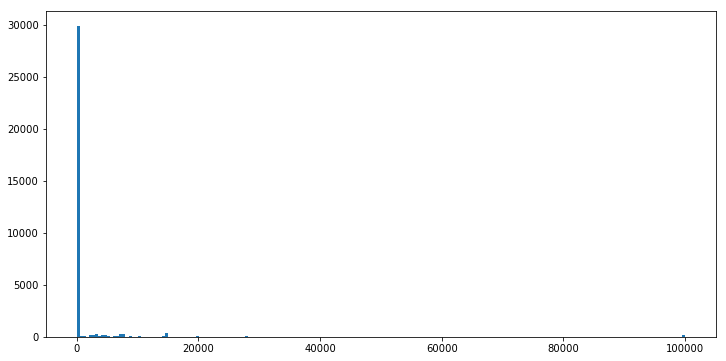

In [12]:
plt.figure(figsize=(12, 6))
plt.hist(df['Capital_Gain'], bins=np.linspace(0, 100000, 200))
plt.show()

El histograma anterior muestra claramente casi todos los datos de la muestra tienen *Capital_Gain* igual a cero. Esto comprueba alguna de las cosas que mencionamos en la sección 2.1.1:

* La moda es muy significativa, reflejado por la tasa de variación.
* Existe una enorme concentración de datos en la vecindad de la media aritmética, hipótesis obtenida a través de la curtosis.

Para averiguar las porciones en las que están distribuidos los datos, usaremos un piechart. Debido al dominio de la variable *Capital_Gain*, lo haremos por los segmentos:

* $x = 0$
* $x \in \left]0, 5000\right]$
* $x \in \left]5000, 10000\right]$
* $x \in \left]10000, 20000\right]$
* $x \in \left]20000, 50000\right]$
* $x \in \left]50000, 10000\right]$

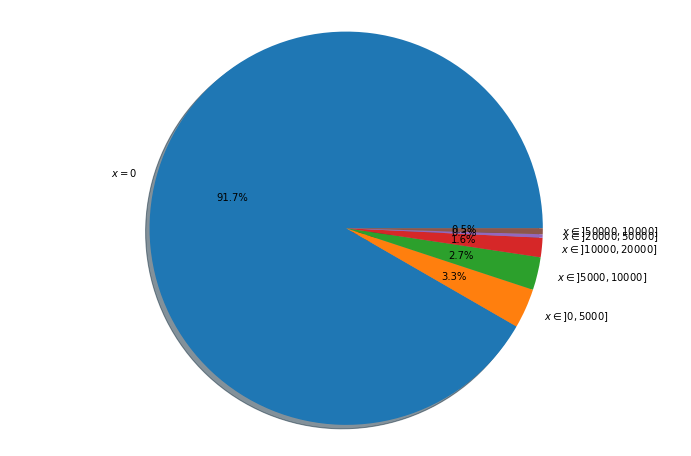

In [13]:
labels = ('$x = 0$', '$x \in ]0, 5000]$', '$x \in ]5000, 10000]$', '$x \in ]10000, 20000]$', 
          '$x \in ]20000, 50000]$', '$x \in ]50000, 10000]$')
sizes = [
    df[df['Capital_Gain'] == 0]['Capital_Gain'].count(),
    df[(df['Capital_Gain'] > 0) & (df['Capital_Gain'] <= 5000)]['Capital_Gain'].count(),
    df[(df['Capital_Gain'] > 5000) & (df['Capital_Gain'] <= 10000)]['Capital_Gain'].count(),
    df[(df['Capital_Gain'] > 10000) & (df['Capital_Gain'] <= 20000)]['Capital_Gain'].count(),
    df[(df['Capital_Gain'] > 20000) & (df['Capital_Gain'] <= 50000)]['Capital_Gain'].count(),
    df[(df['Capital_Gain'] > 50000) & (df['Capital_Gain'] <= 100000)]['Capital_Gain'].count()
]

plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

Del gráfico anterior, se ve claramente que existen muchos valores nulos de *Capital_Gain* en la muestra; para ser concretos, el 91.7% corresponden a 0.

Por último, graficaremos un boxplot para visualizar la variación de nuestra variable de interés:

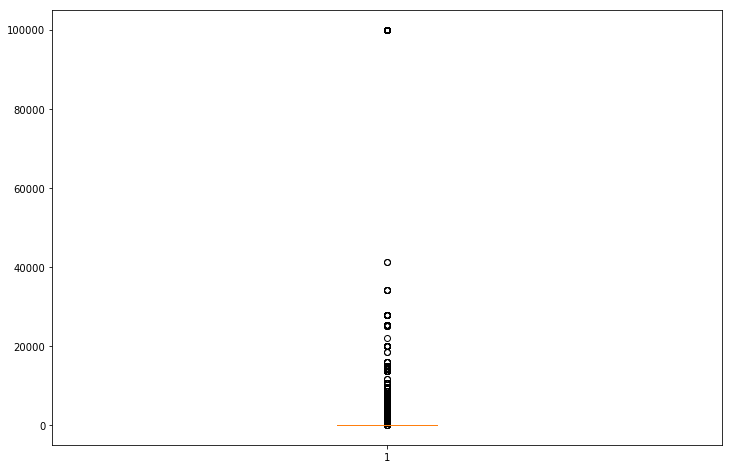

In [14]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['Capital_Gain'])
plt.show()

Si bien, no es bien apreciable a simple vista se tiene que el ancho de la caja del boxplot tiene valor nulo. Esto ocurre por el simple hecho de que el primer y tercer cuartil tienen el mismo valor: cero; es por esto que el ancho de la caja también tiene valor nulo. Por otro lado, como el dominio de las variables es mucho más grande que el dominio de valores que abarca la caja del boxplot, no es posible apreciar el bigote superior.

### 2.2.2. &nbsp;&nbsp; Education Num

De la misma forma que lo hicimos con la variable *Capital_Gain*, realizaremos un histograma de nuestra variable de interés para ver cómo se distribuyen los datos:

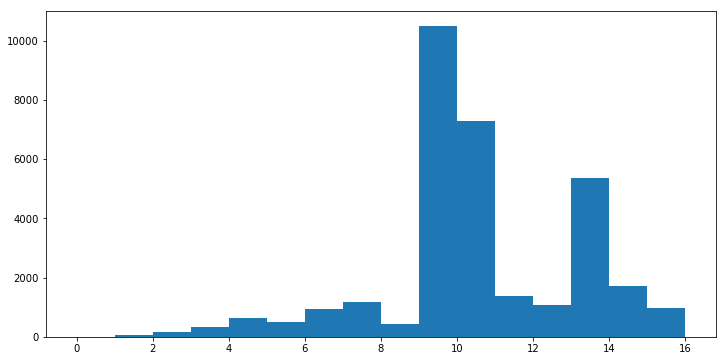

In [15]:
plt.figure(figsize=(12, 6))
plt.hist(df['Education_Num'], bins=np.arange(0, 17))
plt.show()

El histograma anterior muestra que efectivamente el dato que más se repite, es decir, la moda es de $9$. Por otro lado, se observa que esta no es muy significativa ya que existen otros valores que se repiten en grandes cantidades como lo son el $10$ y el $13$. Esto explica el por qué la tasa de variación es de $0.67749$.

Posteriormente, graficaremos un pie chart para averiguar las proporciones de cada dato respecto al total:

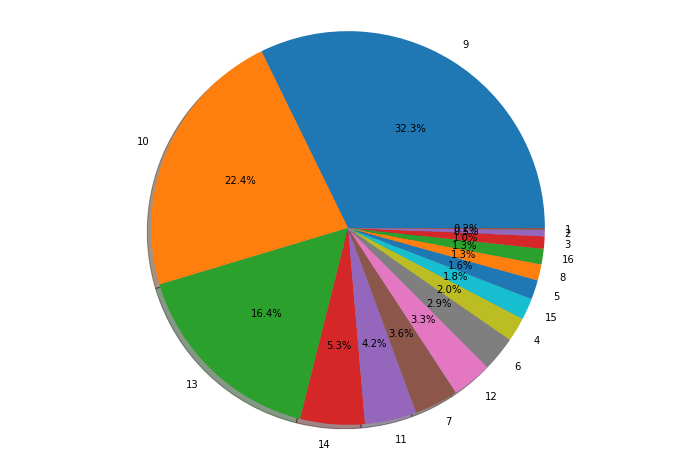

In [16]:
labels = df['Education_Num'].value_counts().index.tolist()

plt.figure(figsize=(12, 8))
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.pie(df['Education_Num'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

El pie chart muestra que la moda ocupa un total del $32.3\%$ de los datos, pero que además existe una gran ocurrencia entre aquellas personas que tienen un *Education_Num* de $10$ y $13$, tal cual como se vio en el histograma. Por otro lado, sólo una infima parte de la muestra tiene el máximo *Education_Num*: 16; ocupando un $1.3\%$ de la muestra.

Por último, graficaremos un boxplot para visualizar la variación de nuestra variable de interés:

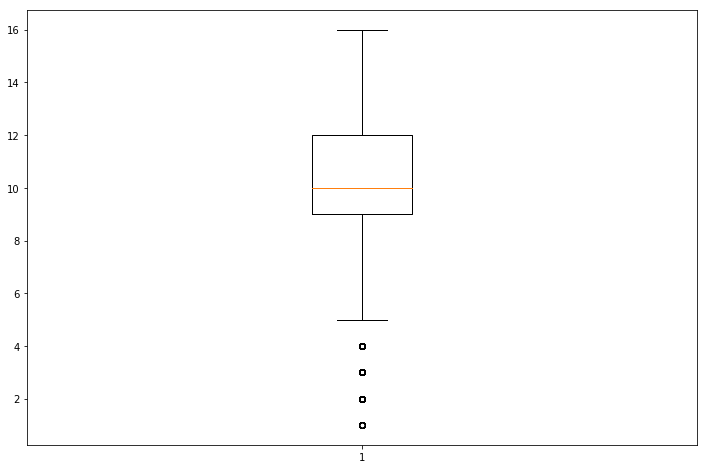

In [17]:
plt.figure(figsize=(12, 8))
plt.boxplot(df['Education_Num'])
plt.show()

Finalmente, el boxplot anterior muestra que al menos el $50\%$ de los encuestados tiene un *Education_Num* ubicado entre $9$ y $12$, cuya media es $10$. Si bien, el máximo *Education_Num* es de $16$, la gráfica no muestra que este sea un dato atípico; sin embargo, sí lo son aquellos que tienen un *Education_Num* inferior a $5$. Los 3 gráficos realizados para *Education_Num* muestran que si hay presencia de individuos que tienen un *Education_Num* inferior a $5$, arrojando la presencia de outliers.

## 2.3. &nbsp;&nbsp;&nbsp; Separación por Target

A continuación realizaremos el mismo estudio que hicimos previamente, pero esta vez separaremos la data por target, es decir:

* Aquellos que ganan sobre 50K ($>50K$)
* Aquellos que ganan a lo más 50K ($\leq50K$)

Por lo anterior, separamos nuestro dataframe por target:

In [18]:
lower_than_50K_df = df[df['Result'] == ' <=50K']
upper_than_50K_df = df[df['Result'] == ' >50K']

Ahora que tenemos el dataframe separado por target, procedemos a repetir el proceso de las secciones 2.1 y 2.2.

### 2.3.1. &nbsp;&nbsp; Estudio de Estadística Descriptiva a dos variables

Con el objetivo de realizar un estudio comparativo con los resultados obtenidos previamente, nuestras variables de interés serán *Capital_Gain* y *Education_Num*.

#### 2.3.1.1. &nbsp; Capital Gain

Analizaremos los principales estadísticos de la variable de interés para ambos target:

In [19]:
print ("Caso <=50K")
lower_than_50K_df['Capital_Gain'].describe()

Caso <=50K


count    24720.000000
mean       148.752468
std        963.139307
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      41310.000000
Name: Capital_Gain, dtype: float64

In [20]:
print ("Caso >50K")
upper_than_50K_df['Capital_Gain'].describe()

Caso >50K


count     7841.000000
mean      4006.142456
std      14570.378951
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital_Gain, dtype: float64

De acuerdo a lo anterior, vemos que existe una mayor ocurrencia de aquellas personas que ganan menos de $50K$. Por otro lado, la media aritmética aumenta en el caso de las personas que ganan por sobre $50K$. Como en ambas muestras los tres primeros cuartiles son igual a cero, se infiere que en el segundo caso ($>50K$) existe una proporción bastante menor en generar algo de *Capital_Gain*.

A continuación, pasaremos a analizar la moda y la tasa de variación:

In [21]:
print ("Caso <=50K")
capital_gain_mode = lower_than_50K_df['Capital_Gain'].mode()
print ("Moda Capital_Gain: " + str(capital_gain_mode.values[0]))

moda_values = lower_than_50K_df[
    lower_than_50K_df['Capital_Gain'] == capital_gain_mode.values[0]]['Capital_Gain'].count()
fm = moda_values / lower_than_50K_df['Capital_Gain'].count()
tasa_variacion = 1 - fm
print ("Tasa de Variacion: " + str(tasa_variacion))

print ("\nCaso >50K")
capital_gain_mode = upper_than_50K_df['Capital_Gain'].mode()
print ("Moda Capital_Gain: " + str(capital_gain_mode.values[0]))

moda_values = upper_than_50K_df[
    upper_than_50K_df['Capital_Gain'] == capital_gain_mode.values[0]]['Capital_Gain'].count()
fm = moda_values / upper_than_50K_df['Capital_Gain'].count()
tasa_variacion = 1 - fm
print ("Tasa de Variacion: " + str(tasa_variacion))

Caso <=50K
Moda Capital_Gain: 0
Tasa de Variacion: 0.0418689320388

Caso >50K
Moda Capital_Gain: 0
Tasa de Variacion: 0.21387578115


Los resultados anteriores evidencian que el dato que más se repite para ambos casos es $0$. Sin embargo, para el segundo caso se evidencia que, a través de la tasa de variación, que la moda es menos significativa dando a conocer que el dato $0$ no es tan repetitivo como en el primer caso.

Por último, vemos qué tan concentrados están los datos respecto a la media a través de la curtosis:

In [22]:
kurtosis_lt50K = lower_than_50K_df['Capital_Gain'].kurtosis()
kurtosis_ut50K = upper_than_50K_df['Capital_Gain'].kurtosis()
print ("Caso <=50K: " + str(kurtosis_lt50K))
print ("Caso  >50K:  " + str(kurtosis_ut50K))

Caso <=50K: 605.314584698
Caso  >50K:  35.3056737929


Si bien, para ambos casos existe una gran concentración de los datos entorno a la media aritmética 0, para el caso $\leq 50K$ se tiene que esta es mucho mayor que en el otro caso.

Finalmente, realizamos el cuadro resumen que compara los resultados obtenidos a través de este análisis descriptivo:

| Estadístico               | Valor Caso $\leq 50K$ | Valor Caso $>50K$ | Comentario                               |
| ------------------------- | --------------------: | ----------------: | :--------------------------------------- |
| Total de ocurrencias      |                 24720 |              7841 |                                          |
| Media                     |              148.7524 |         4006.1424 | Da la posibilidad de que hay más datos no nulos en el caso $>50K$ por sobre $\leq 50K$. |
| Moda                      |                     0 |                 0 |                                          |
| Tasa de variación         |                0.0418 |            0.2138 | En el caso $\leq 50K$ la moda es más significativa respecto al otro caso. Esto indica que la frecuencia relativa de la moda en el primer caso es mucho mayor que en el segundo. |
| Desviación Estándar       |              963.1393 |        14570.3789 |                                          |
| Curtosis                  |              605.3145 |           35.3056 | Para el caso $\leq 50K$ existe una mayor concentración de datos en la vecindad de la media. Como en ambos casos la media es cero, se tiene que en $\leq 50K$ hay muchos más datos concentrados en la vecindad del valor 0. |
| Mínimo                    |                     0 |                 0 |                                          |
| Máximo                    |                 41310 |             99999 | Aquellos que ganan por sobre $50K$ aspiran a tener un mayor *Capital_Gain*. |
| Primer Cuartil            |                     0 |                 0 |                                          |
| Segundo Cuartil o Mediana |                     0 |                 0 |                                          |
| Tercer Cuartil            |                     0 |                 0 |                                          |

#### 2.3.1.2. &nbsp; Education Num

Analizaremos los principales estadísticos de nuestra variable de interés separados por target:

In [23]:
print ("Caso <=50K")
lower_than_50K_df['Education_Num'].describe()

Caso <=50K


count    24720.000000
mean         9.595065
std          2.436147
min          1.000000
25%          9.000000
50%          9.000000
75%         10.000000
max         16.000000
Name: Education_Num, dtype: float64

In [24]:
print ("Caso >50K")
upper_than_50K_df['Education_Num'].describe()

Caso >50K


count    7841.000000
mean       11.611657
std         2.385129
min         2.000000
25%        10.000000
50%        12.000000
75%        13.000000
max        16.000000
Name: Education_Num, dtype: float64

La descripción anterior arroja información bastante interesante. Como podemos observar, la media aritmética para el caso $>50K$ es mayor incluyendo sus cuartiles respecto al caso $\leq 50K$. Esto quiere decir que si elegimos una persona al azar entre las personas que ganan por sobre los $50K$, es mucho más probable obtener un encuestado con un *Education_Num* mayor al que si hiciéramos la misma prueba con aquellos que ganan a lo más $50K$.

A continuación, procedemos a analizar la moda y la tasa de variación para *Education_Num*:

In [25]:
print ("Caso <=50K")
capital_gain_mode = lower_than_50K_df['Education_Num'].mode()
print ("Moda Education_Num: " + str(capital_gain_mode.values[0]))

moda_values = lower_than_50K_df[
    lower_than_50K_df['Education_Num'] == capital_gain_mode.values[0]]['Education_Num'].count()
fm = moda_values / lower_than_50K_df['Education_Num'].count()
tasa_variacion = 1 - fm
print ("Tasa de Variacion: " + str(tasa_variacion))

print ("\nCaso >50K")
capital_gain_mode = upper_than_50K_df['Education_Num'].mode()
print ("Moda Education_Num: " + str(capital_gain_mode.values[0]))

moda_values = upper_than_50K_df[
    upper_than_50K_df['Education_Num'] == capital_gain_mode.values[0]]['Education_Num'].count()
fm = moda_values / upper_than_50K_df['Education_Num'].count()
tasa_variacion = 1 - fm
print ("Tasa de Variacion: " + str(tasa_variacion))

Caso <=50K
Moda Education_Num: 9
Tasa de Variacion: 0.642961165049

Caso >50K
Moda Education_Num: 13
Tasa de Variacion: 0.716745313098


De la misma forma que ocurrió con la media y los cuartiles, la moda no se queda atrás. Como podemos observar, esta aumenta cuando cambiamos de personas que ganan a lo más $50K$ por aquellas que ganan por sobre esta cantidad (de $9$ pasamos a $13$).

Por último, vemos qué tan concentrados están los datos respecto a la media aritmética usando la curtosis:

In [26]:
kurtosis_lt50K = lower_than_50K_df['Education_Num'].kurtosis()
kurtosis_ut50K = upper_than_50K_df['Education_Num'].kurtosis()
print ("Caso <=50K:  " + str(kurtosis_lt50K))
print ("Caso  >50K: " + str(kurtosis_ut50K))

Caso <=50K:  0.995705537758
Caso  >50K: -0.179648388226


Como podemos observar, para el caso de personas que ganan menos de $50K$ se tiene que los datos están ligeramente más concentrados en la media, es decir, la distribución de la variable de interés está ligeramente apuntada. Muy por el contrario ocurre para el caso de personas que ganan por sobre $50K$, ya que los datos tienden a dispersarse.

Realizamos el cuadro resumen que compara la variable numérica *Education_Num* con personas que ganan a lo más $50K$ vs las que ganan por sobre esa cantidad:

| Estadístico               | Valor Caso $\leq 50K$ | Valor Caso $>50K$ | Comentario                               |
| ------------------------- | --------------------: | ----------------: | :--------------------------------------- |
| Total de ocurrencias      |                 24720 |              7841 |                                          |
| Media                     |                9.5950 |           11.6116 |                                          |
| Moda                      |                     9 |                13 |                                          |
| Tasa de variación         |               0.64296 |            0.7167 | En ambos casos, la moda no es muy significativa. Sin embargo, para el caso $> 50K$ es menor. |
| Desviación Estándar       |                2.4361 |            2.3851 |                                          |
| Curtosis                  |                0.9957 |           -0.1796 | Para el caso de las personas que ganan a lo mas $50K$, hay una mayor concentración de datos (aunque bastante ligera) en torno a la media. Por otro lado, en el caso $> 50K$ los datos tienden a dispersarse respecto al promedio. Hay una mayor heterogeneidad en el segundo caso. |
| Mínimo                    |                     1 |                 2 |                                          |
| Máximo                    |                    16 |                16 |                                          |
| Primer Cuartil            |                     9 |                10 |                                          |
| Segundo Cuartil o Mediana |                     9 |                12 | Existe una brecha en torno a las personas que ganan por sobre $50K$, ya que al menos la mayoría tiende a tener un *Education_Num* por sobre 12, a diferencia del caso $\leq 50K$ ya que la mayoría tiende a tener un *Education_Num* por sobre 9. |
| Tercer Cuartil            |                    10 |                13 |                                          |

Finalmente, concluimos que existe una brecha entre aquellos que ganan menos de $50K$ vs aquellos que ganan por sobre dicha cantidad: aquellos que ganan por sobre $50K$ tienden a tener un mayor *Education_Num*.

### 2.3.2. &nbsp;&nbsp; Visualización

#### 2.3.2.1. &nbsp; Capital_Gain

Para realizar un análisis comparativo consistente, realizaremos los mismos gráficos realizados en la sección 2.2.1. Comenzamos con el histograma:

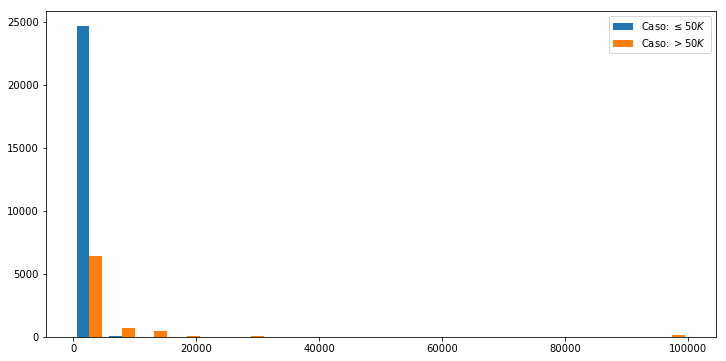

In [27]:
plt.figure(figsize=(12, 6))
data = [lower_than_50K_df['Capital_Gain'], upper_than_50K_df['Capital_Gain']]
plt.hist(data, bins=np.linspace(0, 100000, 20), label=['Caso: $\leq 50K$', 'Caso: $>50K$'])
plt.legend()
plt.show()

El histograma anterior muestra claramente que para las personas que ganan a lo más $50K$ presentan un comportamiento muy homogéneo, a diferencia de las personas que ganan como mínimo dicha cantidad: en esa ocasión existe una mayor heteregenoidad (aunque tampoco es muy apreciable). Dicha afirmación fue demostrada matemáticamente a través de la curtosis.

Por otro lado, el peak registrado para el caso $\leq 50K$ y la gran homogeneidad del caso permite hacer un claro contraste de la significancia de la moda representada a través de la tasa de variación, ya que para el segundo caso ($>50K$) se demostró que había una mayor tasa de variación implicando que la moda no fuese muy significativa para este. La distribución de las barras naranjas deja en claro que may más presencia de datos.

Graficamos los pie charts comparativos según el target del dataset:

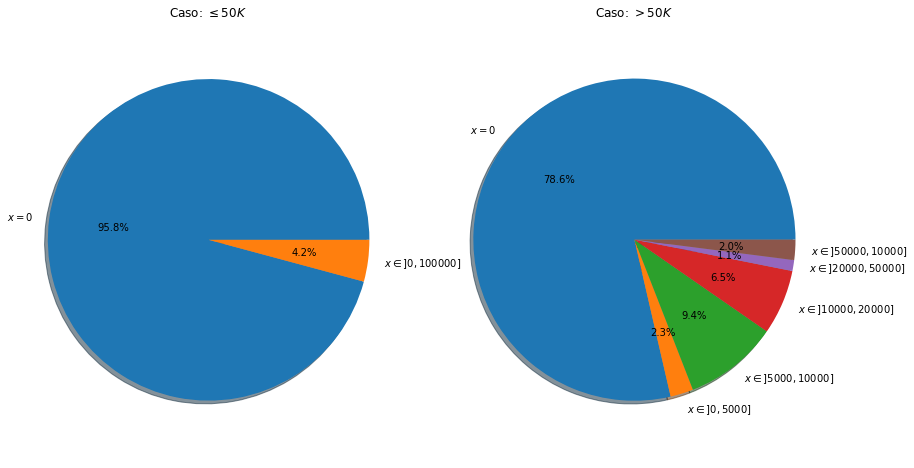

In [28]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
labels = ('$x = 0$', '$x \in ]0, 100000]$')
sizes = [
    lower_than_50K_df[lower_than_50K_df['Capital_Gain'] == 0]['Capital_Gain'].count(),
    lower_than_50K_df[(lower_than_50K_df['Capital_Gain'] > 0) & (lower_than_50K_df['Capital_Gain'] <= 100000)]['Capital_Gain'].count()
]
plt.title('Caso: $\leq 50K$')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')

plt.subplot(1, 2, 2)
labels = ('$x = 0$', '$x \in ]0, 5000]$', '$x \in ]5000, 10000]$', '$x \in ]10000, 20000]$', 
          '$x \in ]20000, 50000]$', '$x \in ]50000, 10000]$')
sizes = [
    upper_than_50K_df[upper_than_50K_df['Capital_Gain'] == 0]['Capital_Gain'].count(),
    upper_than_50K_df[(upper_than_50K_df['Capital_Gain'] > 0) & (upper_than_50K_df['Capital_Gain'] <= 5000)]['Capital_Gain'].count(),
    upper_than_50K_df[(upper_than_50K_df['Capital_Gain'] > 5000) & (upper_than_50K_df['Capital_Gain'] <= 10000)]['Capital_Gain'].count(),
    upper_than_50K_df[(upper_than_50K_df['Capital_Gain'] > 10000) & (upper_than_50K_df['Capital_Gain'] <= 20000)]['Capital_Gain'].count(),
    upper_than_50K_df[(upper_than_50K_df['Capital_Gain'] > 20000) & (upper_than_50K_df['Capital_Gain'] <= 50000)]['Capital_Gain'].count(),
    upper_than_50K_df[(upper_than_50K_df['Capital_Gain'] > 50000) & (upper_than_50K_df['Capital_Gain'] <= 100000)]['Capital_Gain'].count()
]
plt.title('Caso: $>50K$')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')


plt.show()

El resultado es evidente. Con el piechart se demuestra inmediatamente la homogeneidad de la distribución debido a que el $95.8\%$ de los datos de la muestra para el caso $\leq 50K$ corresponden a valores nulos, mientras que el $4.2\%$ se distribuye para valores distintos de cero. En cambio, para aquellos que reciben ingresos por sobre los $50K$ se tiene que casi tres cuartas partes de los datos tiene un *Capital_Gain* nulo. El resto se distribuye en los intervalos que se aprecia en el pie chart de la derecha.

Finalmente, procedemos a realizar un boxplot comparar gráficamente qué tan dispersos están los datos en cada caso:

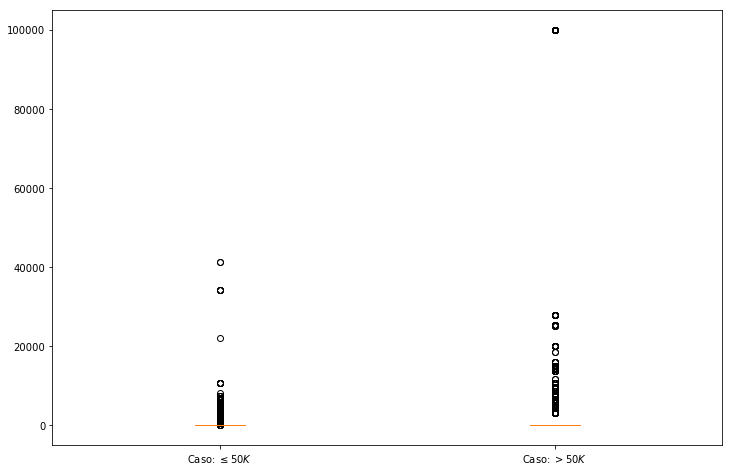

In [29]:
plt.figure(figsize=(12, 8))
plt.boxplot([lower_than_50K_df['Capital_Gain'], upper_than_50K_df['Capital_Gain']], 
            labels=['Caso: $\leq 50K$', 'Caso: $>50K$'])
plt.show()

A pesar de que en el caso $>50K$ se reduce en gran medida la cantidad de valores nulos presentes en la muestra, el primer y tercer cuartil siguien teniendo valores nulos, implicando que el ancho de la caja del boxplot siga siendo $0$. Por otro lado, se logra observar que sus outliers se encuentran más dispersos, a diferencia de $\leq 50K$ donde se encuentran más juntos.

#### 2.3.2.2. &nbsp; Education Num

Comenzaremos graficando el histograma comparativo de ambos casos:

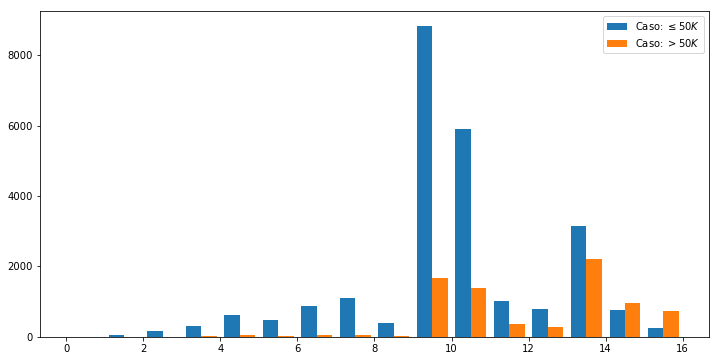

In [30]:
plt.figure(figsize=(12, 6))
data = [lower_than_50K_df['Education_Num'], upper_than_50K_df['Education_Num']]
plt.hist(data, bins=np.arange(0, 17), label=['Caso: $\leq 50K$', 'Caso: $>50K$'])
plt.legend()
plt.show()

De acuerdo al histograma anterior, podemos apreciar que efectivamente existe una mayor concentración de los datos en torno a la media en el caso $\leq 50K$ (curtosis positiva), a diferencia de $>50K$ donde se presenta una mayor dispersión de estos (curtosis negativa).

Continuamos graficando un pie chart comparativo:

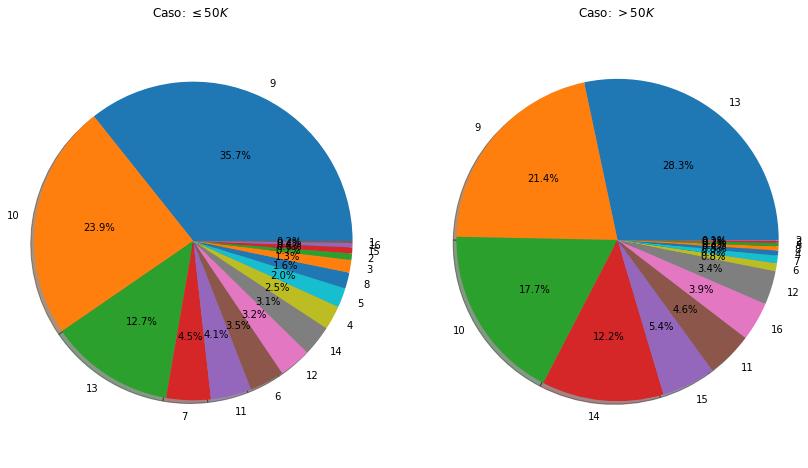

In [31]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
plt.title('Caso: $\leq 50K$')
labels = lower_than_50K_df['Education_Num'].value_counts().index.tolist()
plt.pie(lower_than_50K_df['Education_Num'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.title('Caso: $> 50K$')
labels = upper_than_50K_df['Education_Num'].value_counts().index.tolist()
plt.pie(upper_than_50K_df['Education_Num'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')

plt.show()

Como se puede apreciar en los pie charts, la frecuencia relativa modal en el caso $\leq 50K$ es mayor que en $>50K$. Esto conlleva a que la tasa de variación en el segundo caso disminuya haciendo que la moda sea menos significativa.

Finalmente, pasamos a graficar el boxplot comparativo entre ambos casos de *Education_Num*:

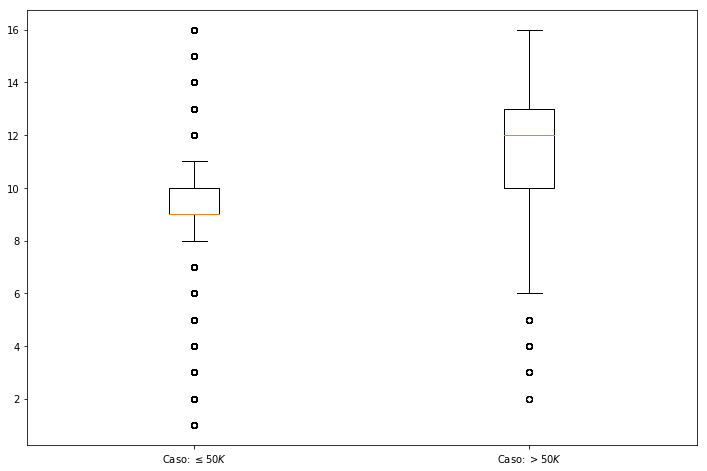

In [32]:
plt.figure(figsize=(12, 8))
plt.boxplot([lower_than_50K_df['Education_Num'], upper_than_50K_df['Education_Num']], 
            labels=['Caso: $\leq 50K$', 'Caso: $>50K$'])
plt.show()

A pesar de haber una mayor cantidad de datos en el caso $\leq 50K$, se puede observar que estos están mucho más concentrados (al menos el $50\%$ de ellos) entre un *Education_Num* entre 9 y 10. Además, todos aquellos que tengan este valor por sobre 11 o bajo 8 son considerados outliers. 

Por otro lado, cuando hablamos del caso $>50K$  se observa que existe una mayor variación (atribuible al valor negativo de la curtosis) respecto al primer caso, es por ello, que la presencia de datos atípicos es menor que en el primer caso. Además, se puede apreciar que al menos el $50\%$ de los encuestados para el segundo caso tiene un *Education_Num* ubicado entre 10 y 13. Aparte, todos aquellos que tengan este valor inferior a 6 serán considerados outliers en la muestra.

## 2.4. &nbsp;&nbsp;&nbsp; Software de Inteligencia de Negocios

Para el desarrollo de esta experiencia se usará el software Qlik. El acceso a al dashboard se puede acceder a través del siguiente link: <span style="color: red;"> Colocar la url </span>